# Amazon Trendforest database
# database obtained from Aaron Frias via Kaggle (https://www.kaggle.com/datasets/aaronfriasr/amazon-products-dataset/data?select=amazon_products.csv)
# Scraped dataset from Sep 2023. Contains pricing & sales data

##TODO
# añadir media de precios a tamaño de hojas

In [1]:
##Importar librerias y datasets
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from bokeh.plotting import figure, show
import altair as alt
from ggplot import *
import holoviews as hv
import folium

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [9]:
# Specify the file paths for the CSV files
categories_file_path = "amazon_categories.csv"
products_file_path = "amazon_products.csv"

# Read the CSV files into DataFrames
categories_df = pd.read_csv(categories_file_path)
products_df = pd.read_csv(products_file_path)

# If there's no common key, you can concatenate them:
data = pd.concat([products_df, categories_df], axis=1)

##Recategorización

In [10]:
# cálculo de dinero gastado en cada producto el último mes, asignado a nueva columna 'Value'
data['Value'] = data.price * data.boughtInLastMonth


In [12]:
# sumar todos los valores de los productos dentro de cada categoría para obtener el total de gasto en esta, asignada a nueva columna 'CategoryValue'
data['CategoryValue'] = data.groupby('newCat')['Value'].transform('sum')
data = data.drop(columns=[ 'asin','imgUrl', 'productURL','reviews','listPrice','isBestSeller','id'])
data.head(200)

title  stars   price  \
0    Sion Softside Expandable Roller Luggage, Black...    4.5  139.99   
1    Luggage Sets Expandable PC+ABS Durable Suitcas...    4.5  169.99   
2    Platinum Elite Softside Expandable Checked Lug...    4.6  365.49   
3    Freeform Hardside Expandable with Double Spinn...    4.6  291.59   
4    Winfield 2 Hardside Expandable Luggage with Sp...    4.5  174.99   
..                                                 ...    ...     ...   
195  Ultra Lite Softside Expandable Spinner, Turquo...    4.5  109.99   
196  X-Bag Large Spinner with Frame - 25 Inch - Sui...    4.8  320.00   
197      Out of Bounds, Smokey Purple, 24-Inch Checked    4.3   99.99   
198  Designer Luggage Collection - Expandable 24 In...    4.4  159.99   
199                                Lite-Cube - Spinner    4.3  508.55   

     category_id  boughtInLastMonth  \
0            104               2000   
1            104               1000   
2            104                300   
3            104                400   
4            104                400   
..           ...                ...   
195          104                  0   
196          104                  0   
197          104                  0   
198          104                  0   
199          104                  0   

                                  category_name  newCat              newName  \
0             Automotive Paint & Paint Supplies     1.0  Automotive Products   
1     Heavy Duty & Commercial Vehicle Equipment     1.0  Automotive Products   
2                     Automotive Tires & Wheels     1.0  Automotive Products   
3                  Automotive Tools & Equipment     1.0  Automotive Products   
4    Automotive Performance Parts & Accessories     1.0  Automotive Products   
..                                          ...     ...                  ...   
195                           Party Decorations    16.0        Miscellaneous   
196                          Travel Accessories    16.0        Miscellaneous   
197                              Rain Umbrellas    16.0        Miscellaneous   
198                                  Gift Cards    16.0        Miscellaneous   
199                                   Fasteners    16.0        Miscellaneous   

        Value  CategoryValue  
0    279980.0      1152952.0  
1    169990.0      1152952.0  
2    109647.0      1152952.0  
3    116636.0      1152952.0  
4     69996.0      1152952.0  
..        ...            ...  
195       0.0         6596.5  
196       0.0         6596.5  
197       0.0         6596.5  
198       0.0         6596.5  
199       0.0         6596.5  

[200 rows x 10 columns]

In [13]:
data.columns

Index(['title', 'stars', 'price', 'category_id', 'boughtInLastMonth',
       'category_name', 'newCat', 'newName', 'Value', 'CategoryValue'],
      dtype='object')

In [14]:
## creación de lista de categorias con valores, ordenadas de manera ascendente por valor
category_value_table = data[['newCat', 'CategoryValue']].drop_duplicates().reset_index(drop=True)
category_value_table_sorted = category_value_table.sort_values(by='CategoryValue', ascending=True)
pd.options.display.float_format = '{:.0f}'.format ## utilizacion de numero simple, no cientifico
print(category_value_table_sorted)

## creación de lista de categorias con valores, ordenadas de manera ascendente por numero de categoria

category_value_table_sorted = category_value_table.sort_values(by='newCat', ascending=True)
pd.options.display.float_format = '{:.0f}'.format
print(category_value_table_sorted)

    newCat  CategoryValue
12      13              0
16      17           2149
14      15           4518
15      16           6596
17      18           6686
9       10           6695
13      14           9896
6        7          10444
11      12          11896
10      11          12296
8        9          15448
7        8          19996
4        5          28272
5        6          29316
2        3         107954
3        4         169948
1        2         363866
0        1        1152952
18     NaN            NaN
    newCat  CategoryValue
0        1        1152952
1        2         363866
2        3         107954
3        4         169948
4        5          28272
5        6          29316
6        7          10444
7        8          19996
8        9          15448
9       10           6695
10      11          12296
11      12          11896
12      13              0
13      14           9896
14      15           4518
15      16           6596
16      17           2149
17      18  

## Total number of products and type

## Category Analysis

In [14]:
# Average price and rating by category
avg_rating_by_category = data.groupby('category_name')['stars'].mean()
avg_rating_by_category

category_name
Abrasive & Finishing Products                      4.4
Accessories & Supplies                             4.0
Additive Manufacturing Products                    4.3
Arts & Crafts Supplies                             4.7
Arts, Crafts & Sewing Storage                      4.5
                                                  ... 
Women's Watches                                    4.7
Xbox 360 Games, Consoles & Accessories             4.4
Xbox One Games, Consoles & Accessories             4.9
Xbox Series X & S Consoles, Games & Accessories    5.0
eBook Readers & Accessories                        4.6
Name: stars, Length: 248, dtype: float64

In [57]:
# Compare the ratings
avg_rating_best_sellers = best_selling_products['stars'].mean()
avg_rating_best_sellers

np.float64(4.494037558685447)

In [60]:
# Average rating and review count
avg_rating = data['stars'].mean()
avg_review_count = data['reviews'].mean()

# Data Visualization

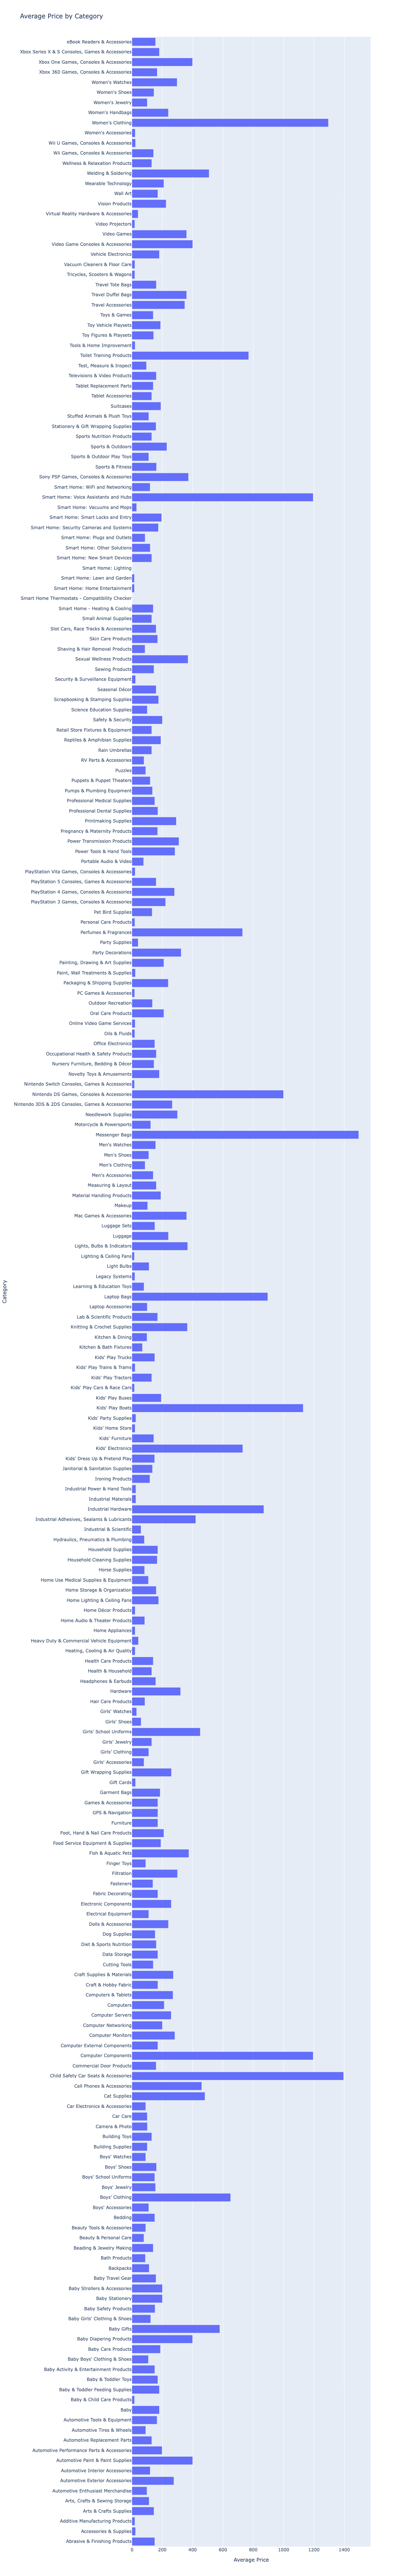

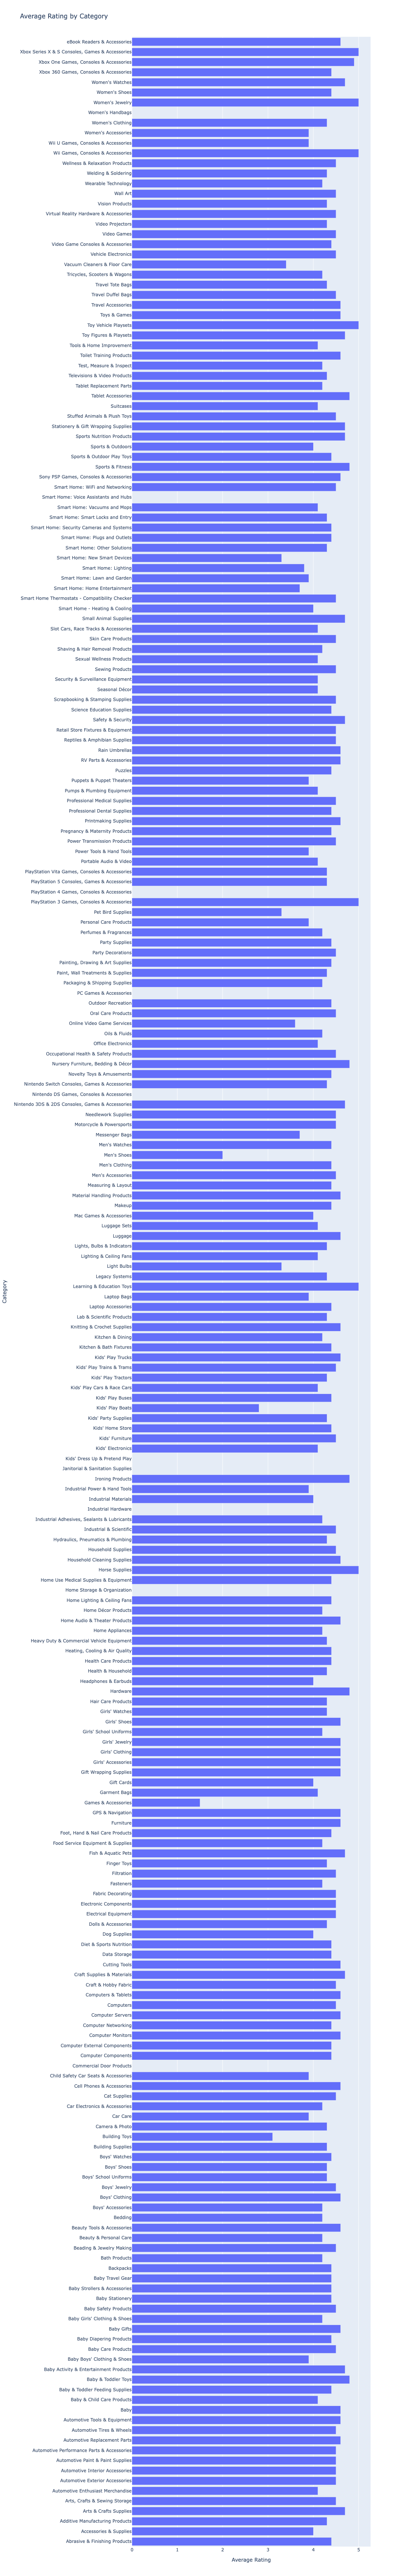

In [12]:
# . Calculate the average price and rating for products in each category
avg_price_by_category = data.groupby('category_name')['price'].mean().reset_index()
avg_price_by_category.columns = ['Category', 'Average Price']

avg_rating_by_category = data.groupby('category_name')['stars'].mean().reset_index()
avg_rating_by_category.columns = ['Category', 'Average Rating']


# . Create an interactive bar chart for average prices

fig2 = px.bar(avg_price_by_category.head(350), x='Average Price', y='Category', orientation='h',
              title='Average Price by Category',
              labels={'Average Price': 'Average Price'})
fig2.update_layout(autosize=False, width=1100, height=7000)

# . Create an interactive bar chart for average ratings
fig3 = px.bar(avg_rating_by_category.head(350), x='Average Rating', y='Category', orientation='h',
              title='Average Rating by Category',
              labels={'Average Rating': 'Average Rating'})
fig3.update_layout(autosize=False, width=1100, height=7000)

# 6. Display the interactive charts
fig2.show()
fig3.show()

In [ ]:
# Find the product with the highest rating
best_product = data[data['stars'] == data['stars'].max()]

# Print the best product information
print("Best Product with Highest Rating:")
print(best_product[['title', 'stars']])

In [ ]:
# Find the product with the highest rating
best_product = data[data['stars'] == data['stars'].max()]

# Create a textual visualization
plt.figure(figsize=(8, 4))
plt.text(0.5, 0.5, f"Best Product with Highest Rating:\n\nTitle: {best_product['title'].values[0]}\nRating: {best_product['stars'].values[0]}", 
         fontsize=14, ha='center', va='center', color='black')
plt.axis('off')
plt.show()

In [ ]:
# Find the product with the lowest rating
worst_product = data[data['stars'] == data['stars'].min()]

# Create a textual visualization for the product with the lowest rating
plt.figure(figsize=(8, 4))
plt.text(0.5, 0.5, f"Worst Product with Lowest Rating:\n\nTitle: {worst_product['title'].values[0]}\nRating: {worst_product['stars'].values[0]}", 
         fontsize=14, ha='center', va='center', color='black')
plt.axis('off')
plt.show()